Análisis exploratorio de datos

In [3]:
import sys
print(sys.executable)

/Users/cbarril/dev/posgrado/vpc2_19co2025/vpc2/bin/python


In [8]:
import src.utils as utils

utils.download_plantvillage_dataset()

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


KeyboardInterrupt: 

Tenemos un dataset de imágenes de plantas que pueden estar sanas o enfermas. El dataset contiene imágenes de 14 especies de plantas, algunas con ciertas enfermedades, y otras con ejemplos de la planta únicamente sanas. Las imágenes están organizadas en carpetas por especie y enfermedad.

Traducción de las especies:

* Apple: Manzana
* Blueberry: Arándano
* Cherry: Cereza
* Corn: Maíz
* Grape: Uva
* Peach: Durazno
* Pepper: Pimiento
* Potato: Papa
* Raspberry: Frambuesa
* Soybean: Soja
* Strawberry: Fresa
* Tomato: Tomate

Traducción de las enfermedades:

* scab: sarna
* black rot: podredumbre negra
* cedar apple rust: roya del manzano y cedro (hinchazón color rojizo a naranja producida por un hongo)
* powdery mildew: oídio (cenicilla o polvillo blanco - enfermedad fúngica)
* cercospora leaf spot / gray leaf spot: mancha foliar por cercospora / mancha foliar gris
* common rust: roya común
* northern leaf blight: tizón foliar del norte
* esca (black measles): esca (manchas negras)
* leaf blight (Isariopsis leaf spot): tizón de la hoja (mancha foliar por Isariopsis)
* Haunglongbing (HLB) / citrus greening: Huanglongbing (HLB) / enverdecimiento de los cítricos
* bacterial spot: mancha bacteriana
* early blight: tizón temprano
* late blight: tizón tardío
* leaf scorch: quemadura de la hoja
* bacterial spot: mancha bacteriana
* leaf mold: moho de la hoja
* septoria leaf spot: mancha foliar por septoria
* spider mites two-spotted spider mite: ácaros araña de dos manchas
* target spot: mancha diana
* mosaic virus: virus del mosaico
* yellow leaf curl virus: virus del rizado amarillo de la hoja

Clases disponibles por especie:

* Apple:
    * healthy
    * scab
    * black rot
    * cedar apple rust
* Blueberry:
    * healthy
* Cherry:
    * healthy
    * powdery mildew
* Corn:
    * healthy
    * cercospora leaf spot / gray leaf spot
    * common rust
    * northern leaf blight
* Grape:
    * healthy
    * black rot
    * esca (black measles)
    * leaf blight (Isariopsis leaf spot)
* Orange:
    * Haunglongbing (HLB) / citrus greening
* Peach:
    * healthy
    * bacterial spot
* Pepper:
    * healthy
    * bacterial spot
* Potato:
    * healthy
    * early blight
    * late blight
* Raspberry:
    * healthy
* Soybean:
    * healthy
* Squash:
    * healthy
* Strawberry:
    * healthy
    * leaf scorch
* Tomato:
    * healthy
    * bacterial spot
    * early blight
    * late blight
    * leaf mold
    * septoria leaf spot
    * spider mites two-spotted spider mite
    * target spot
    * mosaic virus
    * yellow leaf curl virus

Plantas disponibles por clase:

* healthy: Apple, Blueberry, Cherry, Corn, Grape, Peach, Pepper, Potato, Raspberry, Soybean, Strawberry, Tomato
* scab: Apple
* black rot: Apple, Grape
* cedar apple rust: Apple
* powdery mildew: Cherry
* cercospora leaf spot / gray leaf spot: Corn
* common rust: Corn
* northern leaf blight: Corn
* esca (black measles): Grape
* leaf blight (Isariopsis leaf spot): Grape
* Haunglongbing (HLB) / citrus greening: Orange
* bacterial spot: Peach, Pepper, Tomato
* early blight: Potato, Tomato
* late blight: Potato, Tomato
* leaf scorch: Strawberry
* bacterial spot: Tomato
* leaf mold: Tomato
* septoria leaf spot: Tomato
* spider mites two-spotted spider mite: Tomato
* target spot: Tomato
* mosaic virus: Tomato
* yellow leaf curl virus: Tomato

In [ ]:
utils.summarize_plantvillage_dataset()

In [16]:
import pandas as pd
import os

base_dir = '../data/plantvillage/plantvillage dataset'
subfolders = ['color', 'grayscale', 'segmented']
data = []

for sub in subfolders:
    sub_path = os.path.join(base_dir, sub)
    if not os.path.exists(sub_path):
        continue
    for folder in os.listdir(sub_path):
        folder_path = os.path.join(sub_path, folder)
        if not os.path.isdir(folder_path):
            continue
        if '___' in folder:
            species, disease = folder.split('___', 1)
        else:
            species, disease = folder, ''
        img_count = len([
            f for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f))
        ])
        print(sub, " ", species, " ", disease, " ", img_count)
        data.append({
            'Species': species,
            'Disease': disease,
            'Type': sub,
            'ImageCount': img_count
        })

df = pd.DataFrame(data)

color   Strawberry   healthy   456
color   Grape   Black_rot   1180
color   Potato   Early_blight   1000
color   Blueberry   healthy   1502
color   Corn_(maize)   healthy   1162
color   Tomato   Target_Spot   1404
color   Peach   healthy   360
color   Potato   Late_blight   1000
color   Tomato   Late_blight   1909
color   Tomato   Tomato_mosaic_virus   373
color   Pepper,_bell   healthy   1478
color   Orange   Haunglongbing_(Citrus_greening)   5507
color   Tomato   Leaf_Mold   952
color   Grape   Leaf_blight_(Isariopsis_Leaf_Spot)   1076
color   Cherry_(including_sour)   Powdery_mildew   1052
color   Apple   Cedar_apple_rust   275
color   Tomato   Bacterial_spot   2127
color   Grape   healthy   423
color   Tomato   Early_blight   1000
color   Corn_(maize)   Common_rust_   1192
color   Grape   Esca_(Black_Measles)   1383
color   Raspberry   healthy   371
color   Tomato   healthy   1591
color   Cherry_(including_sour)   healthy   854
color   Tomato   Tomato_Yellow_Leaf_Curl_Virus   5357


In [20]:
df.sort_values(['Species', 'Disease', 'Type'], inplace=True)
df

Species              Disease       Type  ImageCount
25    Apple           Apple_scab      color         630
63    Apple           Apple_scab  grayscale         630
101   Apple           Apple_scab  segmented         630
33    Apple            Black_rot      color         621
71    Apple            Black_rot  grayscale         621
..      ...                  ...        ...         ...
47   Tomato  Tomato_mosaic_virus  grayscale         373
85   Tomato  Tomato_mosaic_virus  segmented         373
22   Tomato              healthy      color        1591
60   Tomato              healthy  grayscale        1591
98   Tomato              healthy  segmented        1591

[114 rows x 4 columns]

In [22]:
import numpy as np

pivot = df.pivot_table(index=['Species', 'Disease'], columns='Type', values='ImageCount', fill_value=0)
pivot['AllEqual'] = pivot.apply(lambda row: np.all(row == row.iloc[0]), axis=1)
print(pivot)

Type                                                           color  \
Species                 Disease                                        
Apple                   Apple_scab                             630.0   
                        Black_rot                              621.0   
                        Cedar_apple_rust                       275.0   
                        healthy                               1645.0   
Blueberry               healthy                               1502.0   
Cherry_(including_sour) Powdery_mildew                        1052.0   
                        healthy                                854.0   
Corn_(maize)            Cercospora_leaf_spot Gray_leaf_spot    513.0   
                        Common_rust_                          1192.0   
                        Northern_Leaf_Blight                   985.0   
                        healthy                               1162.0   
Grape                   Black_rot                             11

In [28]:
color_count = df[df['Type'] == 'color']['ImageCount'].sum()
print("Number of rows with type color:", color_count)

color_count = df[df['Type'] == 'grayscale']['ImageCount'].sum()
print("Number of rows with type grayscale:", color_count)

color_count = df[df['Type'] == 'segmented']['ImageCount'].sum()
print("Number of rows with type segmented:", color_count)

Number of rows with type color: 54305
Number of rows with type grayscale: 54305
Number of rows with type segmented: 54306


In [29]:
df[df['Species'] == 'Grape']

Species                             Disease       Type  ImageCount
1    Grape                           Black_rot      color        1180
39   Grape                           Black_rot  grayscale        1180
77   Grape                           Black_rot  segmented        1180
20   Grape                Esca_(Black_Measles)      color        1383
58   Grape                Esca_(Black_Measles)  grayscale        1383
96   Grape                Esca_(Black_Measles)  segmented        1384
13   Grape  Leaf_blight_(Isariopsis_Leaf_Spot)      color        1076
51   Grape  Leaf_blight_(Isariopsis_Leaf_Spot)  grayscale        1076
89   Grape  Leaf_blight_(Isariopsis_Leaf_Spot)  segmented        1076
17   Grape                             healthy      color         423
55   Grape                             healthy  grayscale         423
93   Grape                             healthy  segmented         423

In [31]:
import os

base_dir = '../data/plantvillage/plantvillage dataset'
species_disease = 'Grape___Esca_(Black_Measles)'

color_path = os.path.join(base_dir, 'color', species_disease)
segmented_path = os.path.join(base_dir, 'segmented', species_disease)

def get_uuids(file_list):
    return set(f.split('_')[0] for f in file_list)

color_files = set(os.listdir(color_path)) if os.path.exists(color_path) else set()
segmented_files = set(os.listdir(segmented_path)) if os.path.exists(segmented_path) else set()

color_uuids = get_uuids(color_files)
segmented_uuids = get_uuids(segmented_files)

only_in_segmented = segmented_uuids - color_uuids
print("UUIDs in segmented but not in color:", only_in_segmented)

UUIDs in segmented but not in color: {'7e1fd9b9-1fd9-4f98-93f5-8cf9ebc60dd9'}


Total files found: 162916


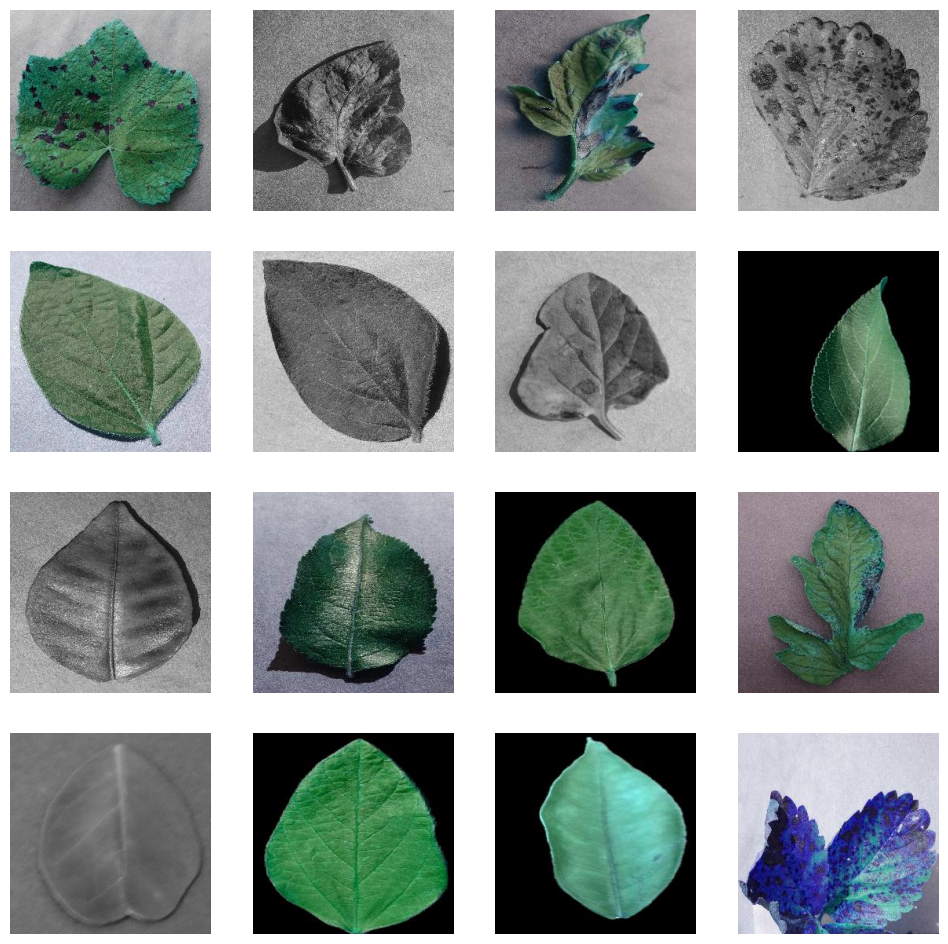

In [6]:
import os
import random
import numpy as np
from PIL import Image
import supervision as sv

base_dir = '../data/plantvillage/plantvillage dataset'
types = ['color', 'grayscale', 'segmented']
all_files = []

# Collect all files as type/relative_path
for t in types:
    type_dir = os.path.join(base_dir, t)
    for root, dirs, files in os.walk(type_dir):
        for file in files:
            rel_path = os.path.relpath(os.path.join(root, file), type_dir)
            all_files.append(f"{t}/{rel_path}")

print(f"Total files found: {len(all_files)}")

# Show 16 random images in a 4x4 grid
sample_files = random.sample(all_files, 16)
images = [np.array(Image.open(os.path.join(base_dir, f))) for f in sample_files]
sv.plot_images_grid(images, grid_size=(4, 4))

Total files found: 162916


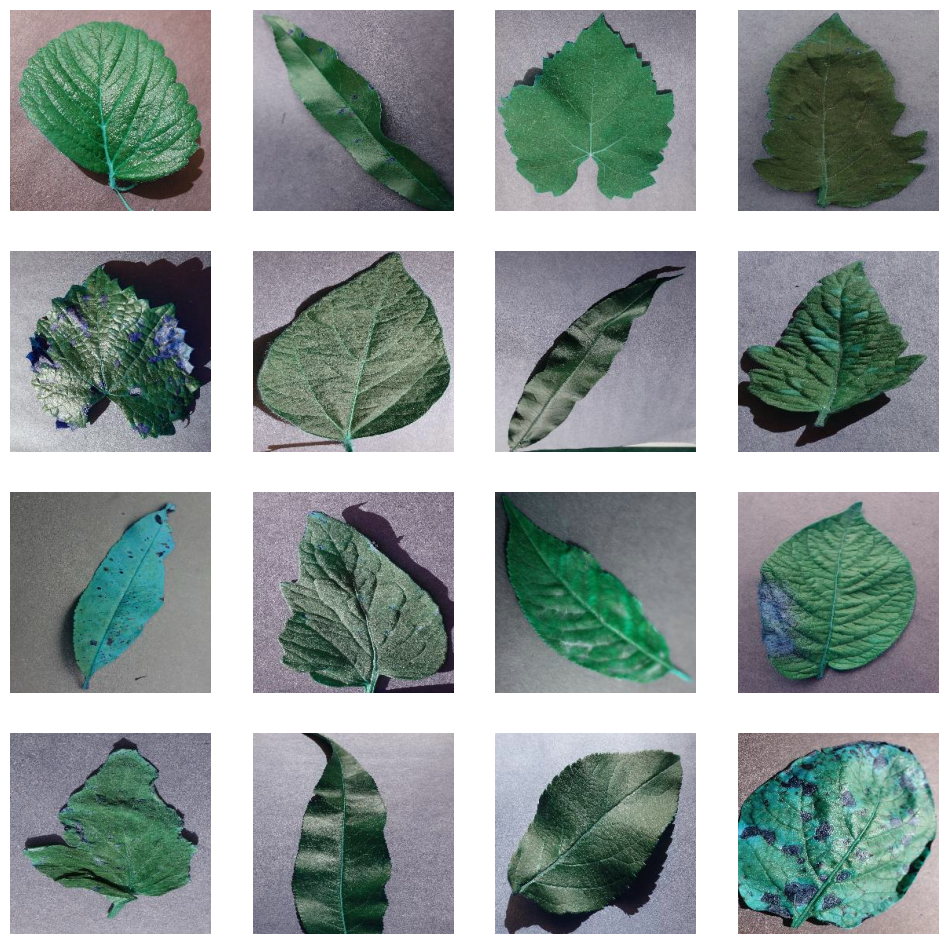

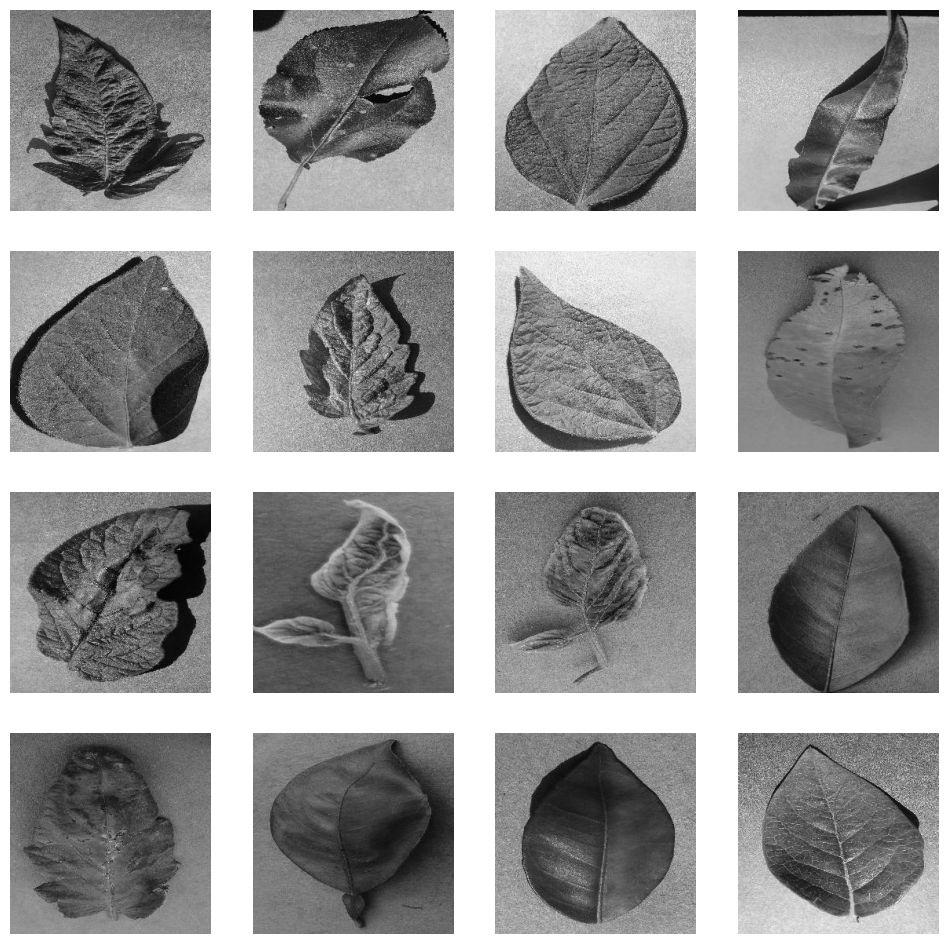

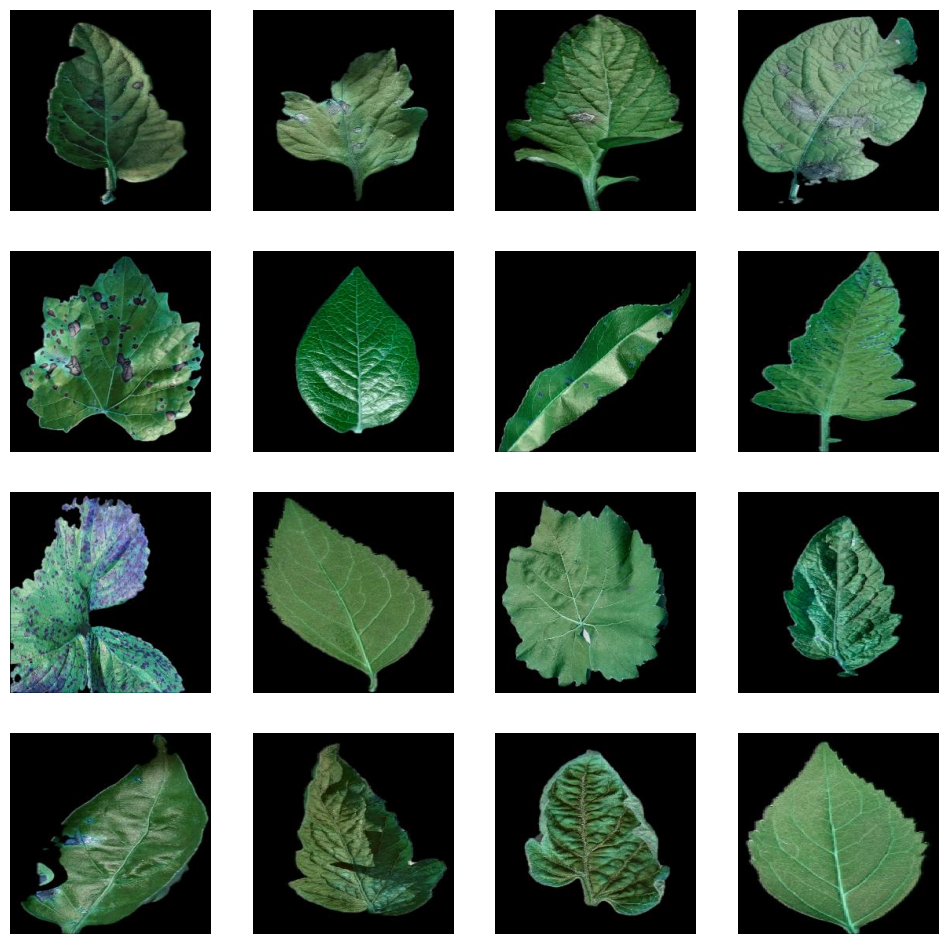

In [8]:
import os
import random
import numpy as np
from PIL import Image
import supervision as sv

base_dir = '../data/plantvillage/plantvillage dataset'
types = ['color', 'grayscale', 'segmented']
all_files = []

# Collect all files as type/relative_path
for t in types:
    type_dir = os.path.join(base_dir, t)
    for root, dirs, files in os.walk(type_dir):
        for file in files:
            rel_path = os.path.relpath(os.path.join(root, file), type_dir)
            all_files.append(f"{t}/{rel_path}")

print(f"Total files found: {len(all_files)}")

# Show 16 random images for each type in a 4x4 grid
for t in types:
    files_of_type = [f for f in all_files if f.startswith(f"{t}/")]
    sample_files = random.sample(files_of_type, 16)
    images = [np.array(Image.open(os.path.join(base_dir, f))) for f in sample_files]
    sv.plot_images_grid(images, grid_size=(4, 4))